# k-Means Example
Random Synthetic Data 

1. What the popular clustering techniques are and when to use them
2. What the k-means algorithm is
3. How to implement k-means clustering in Python
4. How to evaluate the performance of clustering algorithms
5. How to build and tune a robust k-means clustering pipeline in Python
6. How to analyze and present clustering results from the k-means algorithm



In [1]:
# importing the modules 
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
import importCSV as csv
import heatmap as hp

## Silhousette Coefficent
The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

    1. How close the data point is to other points in the cluster
    2. How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters. 

In [5]:
data = csv.oneMonth('split_by_month_output/000/2008_10.csv')
data = data.drop(['Altitude','Zero', 'Num of Days', 'Date', 'Time'], axis=1)

kmeans_kwargs =  {
    'init':'random',
    'n_init':10,
    'max_iter':300,
    'random_state':42,
}

silhouette_coefficients = []

In [6]:
for k in range(50,400):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_coefficients.append(score)

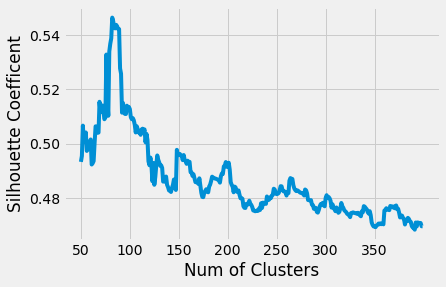

In [14]:
plt.style.use("fivethirtyeight")
plt.plot(range(50,400), silhouette_coefficients)
plt.xticks(range(50,400, 50))
plt.xlabel("Num of Clusters")
plt.ylabel("Silhouette Coefficent")
plt.show()

In [10]:
highest = max(silhouette_coefficients)
index = silhouette_coefficients.index(highest)

print(f"Approx. KMean Cluster: {index}")

Approx. KMean Cluster: 32


In [18]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)
scaled_features[:5]

array([[ 0.05275282, -0.1654774 ],
       [ 0.0522938 , -0.16443098],
       [ 0.05236627, -0.1654774 ],
       [ 0.05241459, -0.1664921 ],
       [ 0.05161735, -0.17036068]])

In [19]:
print(kmeans.inertia_)

print(kmeans.cluster_centers_)

print(kmeans.n_iter_)

0.0003066533432864559
[[ 39.906551   116.392757  ]
 [ 39.98482023 116.30608   ]
 [ 39.90607186 116.37681971]
 [ 40.008763   116.323706  ]
 [ 40.0047875  116.3074015 ]
 [ 40.00896618 116.29685718]
 [ 39.90034177 116.393634  ]
 [ 40.00895812 116.32249275]
 [ 39.8983615  116.3922475 ]
 [ 39.999551   116.32466225]
 [ 39.984741   116.2993252 ]
 [ 40.009986   116.29673057]
 [ 39.90226417 116.3935305 ]
 [ 39.9847238  116.2995604 ]
 [ 40.006909   116.319425  ]
 [ 40.00750982 116.31933264]
 [ 40.011455   116.29713186]
 [ 40.00387333 116.30977383]
 [ 40.01021057 116.29726929]
 [ 39.98446167 116.30739356]
 [ 39.98465275 116.30199013]
 [ 40.008617   116.322234  ]
 [ 39.8978735  116.392527  ]
 [ 40.00835114 116.29656643]
 [ 40.01055033 116.29685883]
 [ 39.98448783 116.30842517]
 [ 40.005223   116.30655082]
 [ 40.01023425 116.29744338]
 [ 39.90642    116.38715183]
 [ 40.00875175 116.32149208]
 [ 39.906584   116.39325725]
 [ 40.0106898  116.2967158 ]
 [ 40.00722063 116.29659325]
 [ 39.97742136 116.32

In [20]:
kmeans.labels_[:5]

array([155, 155, 155, 155, 155], dtype=int32)

## Elbow Method
There’s a sweet spot where the SSE curve starts to bend known as the elbow point. 

The x-value of this point is thought to be a reasonable trade-off between error and number of clusters.

In [35]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
r = range(20,45)
sse = []
for k in r:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

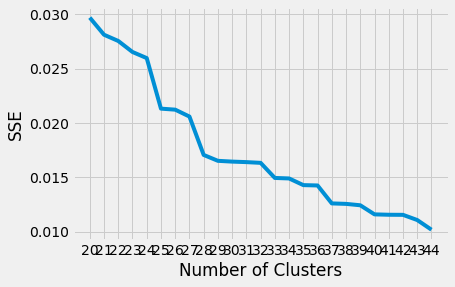

In [36]:
plt.style.use("fivethirtyeight")
plt.plot(r, sse)
plt.xticks(r)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [37]:
kl = KneeLocator(
    r, sse, curve="convex", direction="decreasing"
)

print(kl.elbow)

25


In [38]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

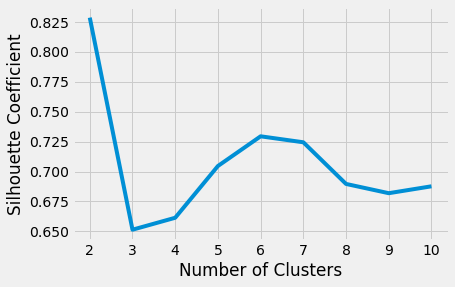

In [39]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Advanced Technique via the ground truth
Ground truth labels categorize data points into groups based on assignment by a human or an existing algorithm. These types of metrics do their best to suggest the correct number of clusters but can be deceiving when used without context.

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [21]:
features, true_labels = make_moons(
    n_samples=250, noise=0.05, random_state=42
)
scaled_features = scaler.fit_transform(data)

In [22]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_features, kmeans.labels_
).round(2)

dbscan_silhouette = silhouette_score(
    scaled_features, dbscan.labels_
).round (2)

In [23]:
print(kmeans_silhouette)

print(dbscan_silhouette)

0.83
0.34


In [24]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)
# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

KeyError: -1

In [28]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

print(round(ari_kmeans, 2))
print(round(ari_dbscan, 2))

0.47
1.0
